# **Klasifikasi Data Larik Sensor Gas Untuk Membedakan Kopi Arabika dan Robusta Dengan Regresi Logistik**

sensor yang digunakan yaitu MQ-3, MQ-4, TGS 2610, MQ-136, dan TGS 822 \
oleh **Zandy Yudha Perwira**
___

## 1. Import Librari yang digunakan

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

## 2. Kelas Regresi Logistik

Update bobot menggunakan gradient dari log likelihood \
$$
\begin{aligned}
\begin{equation*}
  \theta^{new} = \theta^{old} + \eta \sum_{i=1}^{n}{[y^{(i)}-\sigma(\theta^Tx^{(i)})]x_{j}^{(i)}} \\ \\
  \theta = bobot \\
  \eta = learning\ rate \\
  n = jumlah\ data \\
  j = jumlah\ fitur \\
  x = data\ fitur \\ 
  y = label \\
\end{equation*}
\end{aligned} $$

Loss function menggunakan Logistic Loss Function: \
$$
\begin{aligned}
\begin{equation*}
   Cost(h_{\theta}(x),y) = \begin{cases}
-\log(h_{\theta}(x)) & \quad jika\ y = 1 \\
-\log(1-h_{\theta}(x)) & \quad jika\ y = 0.
\end{cases} \\
 \theta = bobot \\
  h = fungsi\ logistik \\
\end{equation*}
\end{aligned} $$ 

$$
\begin{aligned}
\begin{equation*}
   J(\theta) = \frac{1}{n} \sum_{i=1}^{n}{Cost(h_{\theta}(x^{(i)}),y^{(i)})} \\
  J(\theta) = fungsi\ cost \\
  h = fungsi\ logistik \\
  x = data\ fitur \\ 
  y = label \\
\end{equation*}
\end{aligned} $$ 

In [0]:
class LogisticRegression():
    def __init__(self, data_x, data_y, learning_rate=0.01, num_iteration=100000, fit_intercept=True):
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.X = data_x
        self.y = data_y
        self.theta = np.zeros(self.X.shape[1])
        self.gradients = np.zeros(self.X.shape[1])
        self.fit_intercept = fit_intercept
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        temp = 0
        for i in range(len(y)):
            if y[i] == 1:
                temp += -y[i] * np.log(h[i])
            elif y[i] == 0:
                temp += - (1 - y[i]) * np.log(1 - h[i])
        return temp / len(y)
    
    def __compute_gradient(self, data_xi, data_xij, data_yi):
        return (data_yi - self.__sigmoid(np.dot(self.theta.T, data_xi))) * data_xij
    
    def train(self):
        if self.fit_intercept:
            self.X = self.__add_intercept(self.X)
            self.theta = np.zeros(self.X.shape[1])
            self.gradients = np.zeros(self.X.shape[1])
        
        for i in range(self.num_iteration):
            for xi, yi in zip(self.X, self.y):
                for idx,xij in enumerate(xi):
                    self.gradients[idx] += self.__compute_gradient(xi, xij, yi)
                
            for j in range(self.X.shape[1]):
                self.theta[j] += self.learning_rate * self.gradients[j]
                self.gradients[j] = 0
             
            if(i % 100 == 0):
                z = np.dot(self.X, self.theta)
                h = self.__sigmoid(z)
                loss = self.__loss(h, self.y)
                print(f'loss: {loss} \t')

    def predict_prob(self, test_data):
        if self.fit_intercept:
            test_data = self.__add_intercept(test_data)
        return self.__sigmoid(np.dot(test_data, self.theta.T))
    
    def predict(self, test_data):
        return self.predict_prob(test_data)

## 3. Pra-premrosesan Data

In [0]:
def data_preprocessing(standard_scaler, pca, data, col_features, col_target, test=False):
    # Separate data to feature data & target data
    x = data.loc[:, col_features].values
    y = data.loc[:, col_target].values
    
    # Fit transformation to feature columns
    if test == False:
        x = standard_scaler.fit_transform(x)
    else:
        x = standard_scaler.transform(x)
    
    if test == False:
        principal_components = pca.fit_transform(x)
    else:
        principal_components = pca.transform(x)
        
    pc_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2'])
    
    # concate with target column
    pc_data = pd.concat([pc_data, pd.DataFrame(y)], axis=1, ignore_index=True)
    pc_data.columns = ['PC 1', 'PC 2', 'Target']
    
    return pc_data

## 4. Fungsi prediksi

In [0]:
def predict(model_logreg, sensor_data):
    components = pca.transform(sensor_data)
    return model_logreg.predict(components)

## 5. Klasifikasi Data 

### - Membaca data dari file CSV

In [5]:
# read sensor data from csv
arabica = pd.read_csv('arabica.csv')  
robusta = pd.read_csv('robusta.csv')

# combine the both of those data
data = pd.concat([arabica, robusta], ignore_index=True)
data

,Waktu,MQ-3,MQ-4,TGS 2610,MQ-136,TGS 822,Type
0,11:26:55 AM,1739.5,392.0,44.1,1082.9,-39.2,0
1,11:26:56 AM,1739.5,396.9,44.1,1082.9,-39.2,0
2,11:26:57 AM,1739.5,396.9,39.2,1082.9,-39.2,0
3,11:26:58 AM,1739.5,396.9,39.2,1082.9,-39.2,0
4,11:26:59 AM,1739.5,396.9,39.2,1082.9,-39.2,0
...,...,...,...,...,...,...,...
117,11:53:05 AM,1597.4,499.8,73.5,955.5,-137.2,1
118,11:53:06 AM,1597.4,504.7,73.5,960.4,-137.2,1
119,11:53:07 AM,1602.3,499.8,78.4,970.2,-137.2,1
120,11:53:08 AM,1602.3,499.8,78.4,970.2,-137.2,1


### - Pra-premrosesan data

In [6]:
# Preprocessing data
# Note: target = 0 (Arabica) and  1 (Robusta)
pca = PCA(.95)
standard_scaler = StandardScaler()

feature_cols = ['MQ-3', 'MQ-4', 'TGS 2610', 'MQ-136', 'TGS 822'];
target_cols = ['Type']
pc_data = data_preprocessing(standard_scaler, pca, data, feature_cols, target_cols, test=False)
pc_data

,PC 1,PC 2,Target
0,-2.159357,-0.464098,0
1,-2.097455,-0.399828,0
2,-2.028674,-0.622734,0
3,-2.028674,-0.622734,0
4,-2.028674,-0.622734,0
...,...,...,...
117,0.821147,2.754049,1
118,0.866785,2.822634,1
119,0.686799,2.995501,1
120,0.686799,2.995501,1


### - Plot ciri & reduksi dimensi dengan PCA

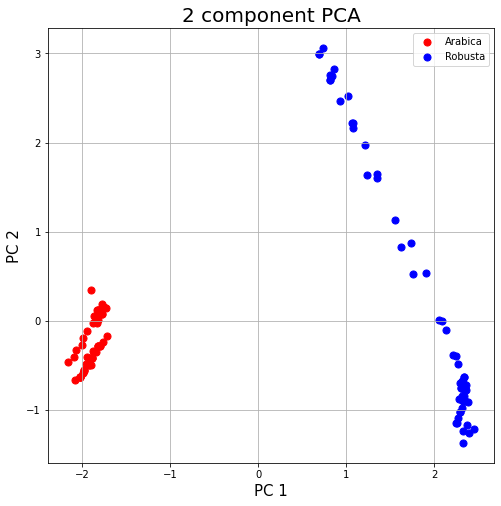

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pc_data['Target'] == target
    ax.scatter(pc_data.loc[indicesToKeep, 'PC 1']
               , pc_data.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(['Arabica', 'Robusta'])
ax.grid()

In [0]:
data_x = pc_data[['PC 1', 'PC 2']].values
data_y = pc_data[['Target']].values
data_y = data_y.flatten()

### - Membuat obyek dari kelas LogisticRegression

In [0]:
model = LogisticRegression(data_x=data_x, data_y=data_y, learning_rate=0.01, num_iteration=100000)

### - Training Data

In [10]:
%time model.train()

loss: 0.11131583005698038 	
loss: 0.002476449569270474 	
loss: 0.0012640471127103913 	
loss: 0.0008500618430314652 	
loss: 0.0006408546664291164 	
loss: 0.0005145216607777717 	
loss: 0.00042992393319900735 	
loss: 0.0003692947647591437 	
loss: 0.0003237026336211897 	
loss: 0.00028816521742129126 	
loss: 0.00025968338139099883 	
loss: 0.0002363434777252686 	
loss: 0.00021686686552197228 	
loss: 0.0002003666177454276 	
loss: 0.00018620814453103657 	
loss: 0.00017392538479059632 	
loss: 0.00016316832611661523 	
loss: 0.00015366898979423811 	
loss: 0.00014521871994569433 	
loss: 0.00013765262339037655 	
loss: 0.00013083866408649552 	
loss: 0.00012466986464208706 	
loss: 0.0001190586287899185 	
loss: 0.00011393254092205623 	
loss: 0.000109231212928687 	
loss: 0.00010490388580076417 	
loss: 0.00010090758327172584 	
loss: 9.720567471080311e-05 	
loss: 9.37667451896769e-05 	
loss: 9.056369874594779e-05 	
loss: 8.757304055163275e-05 	
loss: 8.477429767885295e-05 	
loss: 8.214954821028605e-05 	


### - Cetak Nilai Theta

In [11]:
model.theta

array([-0.04345336,  6.77379472,  2.30967799])

### - Plot Hasil Klasifikasi dengan Boundary Line

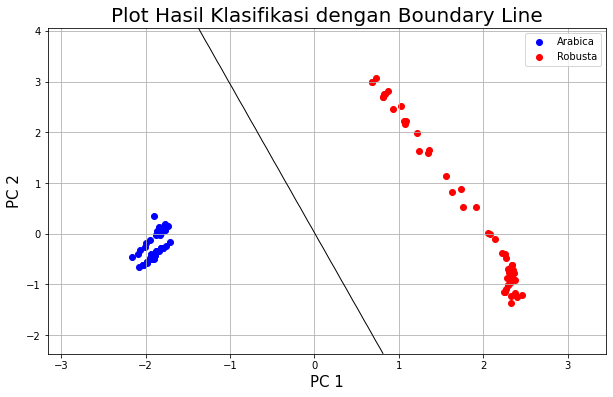

In [12]:
X = data_x
y = np.array(data_y)

plt.figure(figsize=(10, 6))
plt.xlabel('PC 1', fontsize = 15)
plt.ylabel('PC 2', fontsize = 15)
plt.title('Plot Hasil Klasifikasi dengan Boundary Line', fontsize = 20)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend(['Arabica', 'Robusta'])
plt.grid()
x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1,
x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1,
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

### - Plot z vs output h (fungsi logistik)

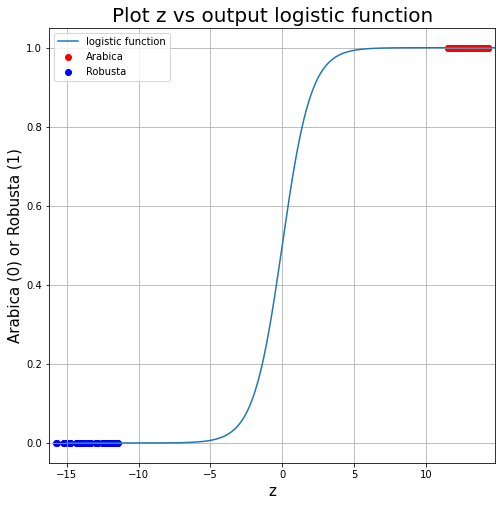

In [13]:
def sigmoid(theta, x):
    x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    z = np.dot(x, theta)
    return z, 1 / (1 + np.exp(-z))

idx = np.array([[i, i] for i in np.arange(-15, 15, 0.1)])
out = sigmoid(model.theta, idx)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('z', fontsize = 15)
ax.set_ylabel('Arabica (0) or Robusta (1)', fontsize = 15)
ax.set_title('Plot z vs output logistic function', fontsize = 20)

z, data_prediction = sigmoid(model.theta, data_x)
plt.scatter(z[y == 1], data_prediction[y == 1], color='r', label='Arabica')
plt.scatter(z[y == 0], data_prediction[y == 0], color='b', label='Robusta')

ax.plot(idx[:,1], [1 / (1 + np.exp(-i)) for i in idx[:,1]])
plt.xlim(min(z) - 0.5,
         max(z) + 0.5)
ax.legend(['logistic function', 'Arabica', 'Robusta'])
ax.grid()

### - Testing

In [14]:
# read sensor data from csv
feature_cols = ['MQ-3', 'MQ-4', 'TGS 2610', 'MQ-136', 'TGS 822'];
target_cols = ['Target']

data_test = pd.read_csv('test.csv', index_col='Waktu')  
data_test

,MQ-3,MQ-4,TGS 2610,MQ-136,TGS 822,Target
Waktu,,,,,,
1:24:38 PM,1700.3,450.8,39.2,1087.8,-34.3,0
1:24:39 PM,1700.3,455.7,39.2,1087.8,-34.3,0
1:24:40 PM,1705.2,455.7,39.2,1087.8,-34.3,0
1:24:41 PM,1705.2,455.7,39.2,1092.7,-44.1,0
1:24:42 PM,1705.2,455.7,44.1,1092.7,-39.2,0
...,...,...,...,...,...,...
1:07:45 PM,1587.6,548.8,53.9,994.7,-68.6,1
1:07:46 PM,1587.6,548.8,53.9,994.7,-68.6,1
1:07:47 PM,1592.5,553.7,53.9,994.7,-68.6,1


In [15]:
data_feature = data_test.loc[:, feature_cols].values
data_target = data_test.loc[:, target_cols].values.flatten()

pc_test_data = data_preprocessing(standard_scaler, pca, data_test, feature_cols, target_cols, test=True)
pc_test_data

,PC 1,PC 2,Target
0,-1.285928,0.006688,0
1,-1.224025,0.070957,0
2,-1.240799,0.076557,0
3,-1.144860,0.155008,0
4,-1.269742,0.340846,0
...,...,...,...
57,0.833301,2.009500,1
58,0.833301,2.009500,1
59,0.878431,2.079369,1
60,0.878431,2.079369,1


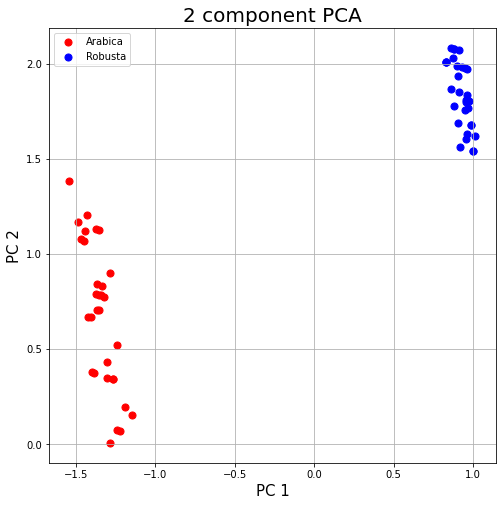

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pc_test_data['Target'] == target
    ax.scatter(pc_test_data.loc[indicesToKeep, 'PC 1']
               , pc_test_data.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(['Arabica', 'Robusta'])
ax.grid()

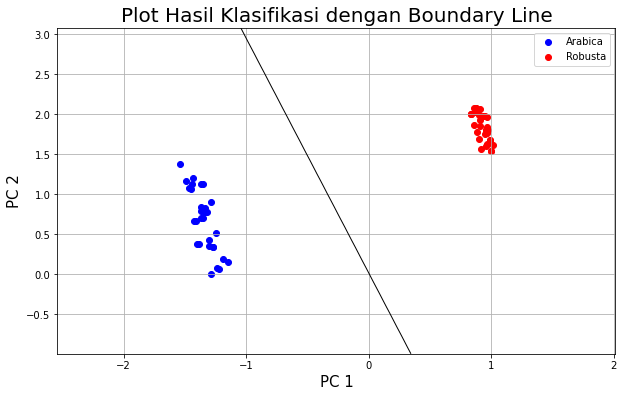

In [17]:
test_X = np.array(pc_test_data)[:,0:2]
test_y = np.array(data_target)

plt.figure(figsize=(10, 6))
plt.xlabel('PC 1', fontsize = 15)
plt.ylabel('PC 2', fontsize = 15)
plt.title('Plot Hasil Klasifikasi dengan Boundary Line', fontsize = 20)
plt.scatter(test_X[test_y == 0][:, 0], test_X[test_y == 0][:, 1], color='b', label='0')
plt.scatter(test_X[test_y == 1][:, 0], test_X[test_y == 1][:, 1], color='r', label='1')
plt.legend(['Arabica', 'Robusta'])
plt.grid()
x1_min, x1_max = test_X[:,0].min() - 1, test_X[:,0].max() + 1,
x2_min, x2_max = test_X[:,1].min() - 1, test_X[:,1].max() + 1,
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

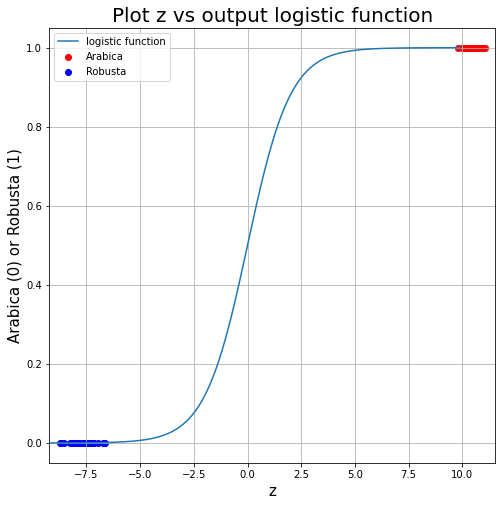

In [18]:
def sigmoid(theta, x):
    x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    z = np.dot(x, theta)
    return z, 1 / (1 + np.exp(-z))

idx = np.array([[i, i] for i in np.arange(-10, 10, 0.1)])
out = sigmoid(model.theta, idx)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('z', fontsize = 15)
ax.set_ylabel('Arabica (0) or Robusta (1)', fontsize = 15)
ax.set_title('Plot z vs output logistic function', fontsize = 20)

z_test, data_prediction_test = sigmoid(model.theta, test_X)
plt.scatter(z_test[test_y == 1], data_prediction_test[test_y == 1], color='r', label='Arabica')
plt.scatter(z_test[test_y == 0], data_prediction_test[test_y == 0], color='b', label='Robusta')

ax.plot(idx[:,1], [1 / (1 + np.exp(-i)) for i in idx[:,1]])
plt.xlim(min(z_test) - 0.5,
         max(z_test) + 0.5)
ax.legend(['logistic function', 'Arabica', 'Robusta'])
ax.grid()

### - Result Test

In [19]:
tn, fp, fn, tp = confusion_matrix(test_y, data_prediction_test.round()).ravel()
print('True Positif (TP): {}'.format(tp))
print('True Negatif (TN): {}'.format(tn))
print('False Positif (FP): {}'.format(fp))
print('False Negatif (FN): {}'.format(fn), end='\r\n\r\n')

print('Accuracy Score :',accuracy_score(test_y, data_prediction_test.round()))
print('Report : ')
print(classification_report(test_y, data_prediction_test.round()))

True Positif (TP): 31
True Negatif (TN): 31
False Positif (FP): 0
False Negatif (FN): 0

Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

